In [1]:
"""
Description: This program replicates the practice given at the following URL: https://github.com/josephlee94/intuitive-deep-learning
The program will implement a neural network in order to predict house prices based on a given CSV dataset.

Name: Andrea Marcelli
"""
import pandas as pd

# Importing the spreadsheet with the data into a data frame through pandas
df = pd.read_csv('housepricedata.csv')
# Display the dataframe
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
# Converting the data frame into an array
dataset = df.values
# Display the array values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [3]:
# Splitting the dataset into input features and label to predict
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing

# Normalizing data to be inside the range between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [7]:
# Creating and Training the Neural Network
from keras.models import Sequential
from keras.layers import Dense

# Creating the first model with three layers, two hidden layers, and one output layer
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), 
    Dense(32, activation='relu'), 
    Dense(1, activation='sigmoid'),
])

# Configuring the model by selecting algorithm to use, loss function, and metrics to track
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Storing the history of the data
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6907 - accuracy: 0.5078 - val_loss: 0.6891 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5205 - val_loss: 0.6849 - val_accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5147 - val_loss: 0.6809 - val_accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5166 - val_loss: 0.6771 - val_accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5176 - val_loss: 0.6735 - val_accuracy: 0.4886
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.5215 - val_loss: 0.6699 - val_accuracy: 0.5023
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.5372 - val_loss: 0.6664 - val_accuracy: 0.5114
Epoch 8/100
3

In [8]:
# Evalutating data
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.9041


0.9041095972061157

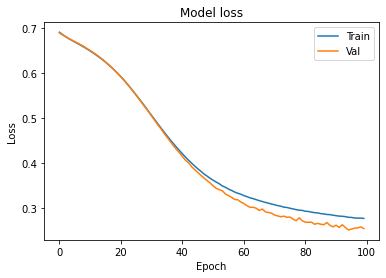

In [9]:
import matplotlib.pyplot as plt

# Creating a plot to visualize the training loss and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

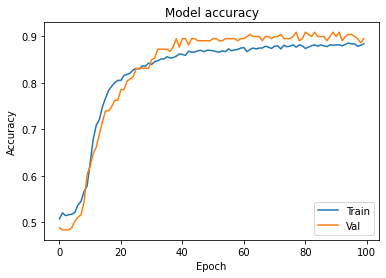

In [16]:
# Creating a plot to visualize training accuracy and the validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
# Creating a model that will overfit
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 32ms/step - loss: 0.4619 - accuracy: 0.7759 - val_loss: 0.3142 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3326 - accuracy: 0.8571 - val_loss: 0.2837 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3113 - accuracy: 0.8718 - val_loss: 0.2740 - val_accuracy: 0.8995
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2996 - accuracy: 0.8796 - val_loss: 0.2461 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2777 - accuracy: 0.8933 - val_loss: 0.2324 - val_accuracy: 0.9178
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2471 - accuracy: 0.8953 - val_loss: 0.2527 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2724 - accuracy: 0.8816 - val_loss: 0.2654 - val_accuracy: 0.8813
Epoch 

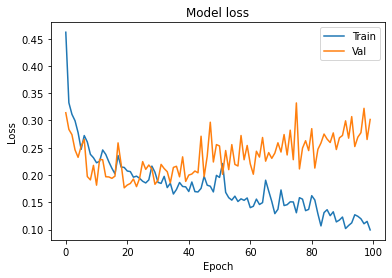

In [20]:
# Creating a plot to visualize the overfitting loss and validation loss
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

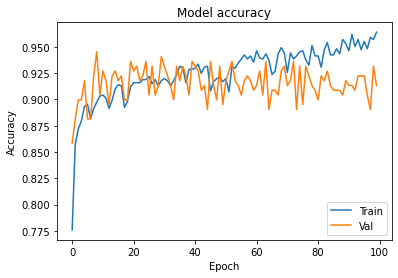

In [21]:
# Creating a plot to visualize the overfitting accuracy and validation accuracy
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
# Creating a third model with L2 regularization and dropout incorporated
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
])

In [31]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 18.9597 - accuracy: 0.7250 - val_loss: 9.9868 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 7.0600 - accuracy: 0.8082 - val_loss: 5.0501 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 4.4364 - accuracy: 0.8542 - val_loss: 3.7156 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 3.4328 - accuracy: 0.8063 - val_loss: 2.9900 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 2.9646 - accuracy: 0.8395 - val_loss: 2.4899 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 2.4405 - accuracy: 0.8523 - val_loss: 2.1128 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 2.1015 - accuracy: 0.8650 - val_loss: 1.9040 - val_accuracy: 0.9041
Epoch

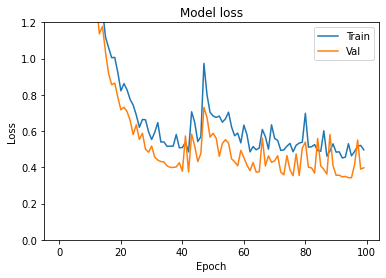

In [32]:
# Creating a plot to visualize the trained loss and validation loss of the third model
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

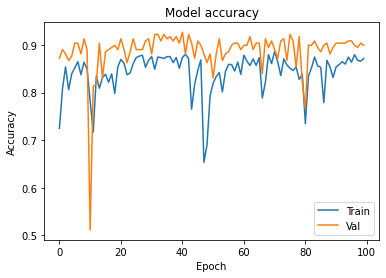

In [33]:
# Creating a plot to visualize the trained accuracy and validation accuracy of the third model
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()